In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
points = pd.read_csv('new.csv')
labels = pd.read_csv('label.csv')

In [5]:
points.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156
0,1,457,412,429,451,473,494,479,456,432,...,638,666,681,664,638,602,547,491,434,377
1,2,465,421,438,460,484,501,485,463,441,...,628,658,671,660,626,586,533,475,417,358
2,3,362,320,338,359,380,395,377,357,339,...,630,664,676,663,629,591,542,489,435,380
3,4,424,377,397,417,439,455,437,416,395,...,639,672,688,672,637,600,548,488,427,366
4,5,454,419,432,453,473,490,473,454,436,...,605,632,645,634,604,568,518,466,411,357


In [6]:
labels.head()

,Unnamed: 0,Index,identity,emotion_idx,emotion_cat,type
0,1,1,111,1,Neutral,simple
1,2,2,114,1,Neutral,simple
2,3,3,115,1,Neutral,simple
3,4,4,116,1,Neutral,simple
4,5,5,117,1,Neutral,simple


In [12]:
X = points.iloc[:, 1:157].values
y = labels.iloc[:, 3].values

array([ 1,  1,  1, ..., 22, 22, 22])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
# predition
y_pred = classifier.predict(X_test)

In [23]:
# print the accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.138


In [19]:
# print the results
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  0  2  2  2  0  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 5  8  0  2  1  2  4  0  2  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [10  3  6  5  1  0  1  0  1  3  1  2  0  0  0  0  1  0  0  0  0  0]
 [ 2  1  3  5  0  1  0  0  0  2  1  1  3  0  0  0  0  0  0  0  1  0]
 [ 5  1  1  1  5  0  1  1  0  0  0  0  0  1  2  0  1  0  0  0  0  0]
 [ 3  4  5  4  0  4  1  0  0  1  0  1  0  0  0  2  0  0  0  0  0  0]
 [ 7  1  2  1  1  0  4  4  1  0  0  0  0  0  1  0  0  0  1  0  0  0]
 [ 3  4  1  2  2  0  3  4  1  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 4  5  0  2  1  1  1  0  0  1  2  0  0  1  0  0  0  0  1  2  0  1]
 [ 0  2  2  5  0  0  0  0  0  4  3  1  1  0  0  0  0  0  0  1  0  0]
 [ 1  0  3  0  1  2  0  1  3  3  1  1  3  1  0  0  0  0  0  0  0  0]
 [ 1  1  4  5  0  0  0  0  2  5  1  0  0  0  1  0  0  0  0  0  0  1]
 [ 2  0  1  5  0  1  0  0  0  3  0  1  1  0  0  0  0  0  0  0  1  0]
 [ 1  0  4  3  2  2  2  1  2  2  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 1  2  4  2  1  1  0  0  0  1  0

In [24]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

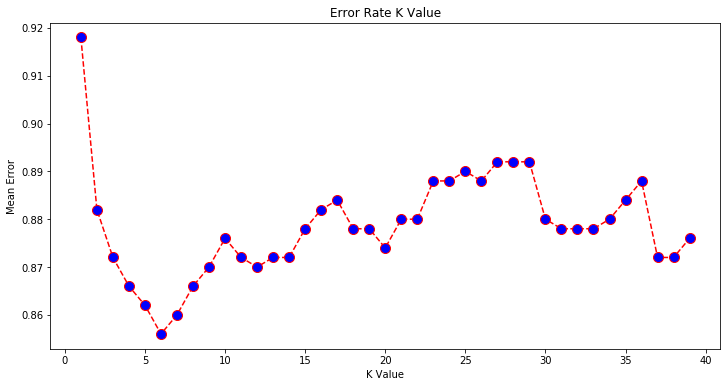

In [21]:
# plot the results with K value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [45]:
# according to previous graph, set n=6 and check the accuracy
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.144


In [55]:
classifier.score(X_test, y_test)

0.144

In [56]:
# cross validation with k=5
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv = 5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.102 (std: 0.012)



In [51]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

/Users/mingming/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=6, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 25}

In [54]:
knn_gscv.best_score_

0.115